In [1]:
import pygmt
import pandas as pd
import numpy as np


In [2]:
opam = pd.read_excel('rvb_min.xlsx')
#eruptions = pd.read_excel('prin_supp2.xlsx')
erupt_p = pd.read_excel('erupt_reyk_P.xlsx')

denisty model - nick weir, RISE, line A, NE end. 
2.5 g cm-3 to 3 km
2.86 to 6
3.03 to 20
3.2 deeper.


In [3]:
grid = pygmt.datasets.load_earth_relief(resolution="01s", region=[-22.75, -21.0, 63.75, 64.12])

pygmt-session [WARNING]: gmt_get_dataset_tiles: No earth_relief_01s_g tiles available for your region.
grdblend [WARNING]: File @N60W030.earth_relief_15s_p.nc has different increments (0.00416666666667/0.00416666666667) than the output grid (0.000277777777778/0.000277777777778) - must resample
grdblend [WARNING]: File @N60W030.earth_relief_15s_p.nc coordinates are phase-shifted w.r.t. the output grid - must resample


In [ ]:


## next, we want to subset the petdb dataset to only include samples from the region.
## In PetDB, longitude goes from -180 to +180.  
#petsam = petbas[(petbas.LONGITUDE > -26.5) & (petbas.LONGITUDE < -24.5) & (petbas.LATITUDE > 62.) & (petbas.LATITUDE < 63.)]


fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M25c", frame="a", cmap="gray", shading=True) # haxby is a colorscale that is OK for oceans
#fig.grdcontour(grid=grid) # plot up contours
fig.coast(shorelines="1/0.5p,gray")
fig.colorbar(frame=["a1000", "x+lElevation", "y+lm"])
pygmt.makecpt(cmap="buda", series=[0., 10.], background = "i", reverse=True) # color scale for Na2O - change series limits
# Plot using circles (c) of 0.15 cm, the sampled bathymetry points
# Points are colored using elevation values (normalized for visual purposes)
fig.plot(
    x=opam.Longitude,
    y=opam.Latitude,
    style="c0.45c",
    pen="white",
    cmap=True,
    color=opam.Pressure_min,
    transparency=opam.K2O/opam.K2O.max()*100. # sill circle according color-scale
)
fig.colorbar(frame=["a1.0", "x+lPressure", "y+lkbar"],position="JBC+o0c/4c")
fig.show()


In [6]:
fig.savefig("reyk_map_p_sam.png")

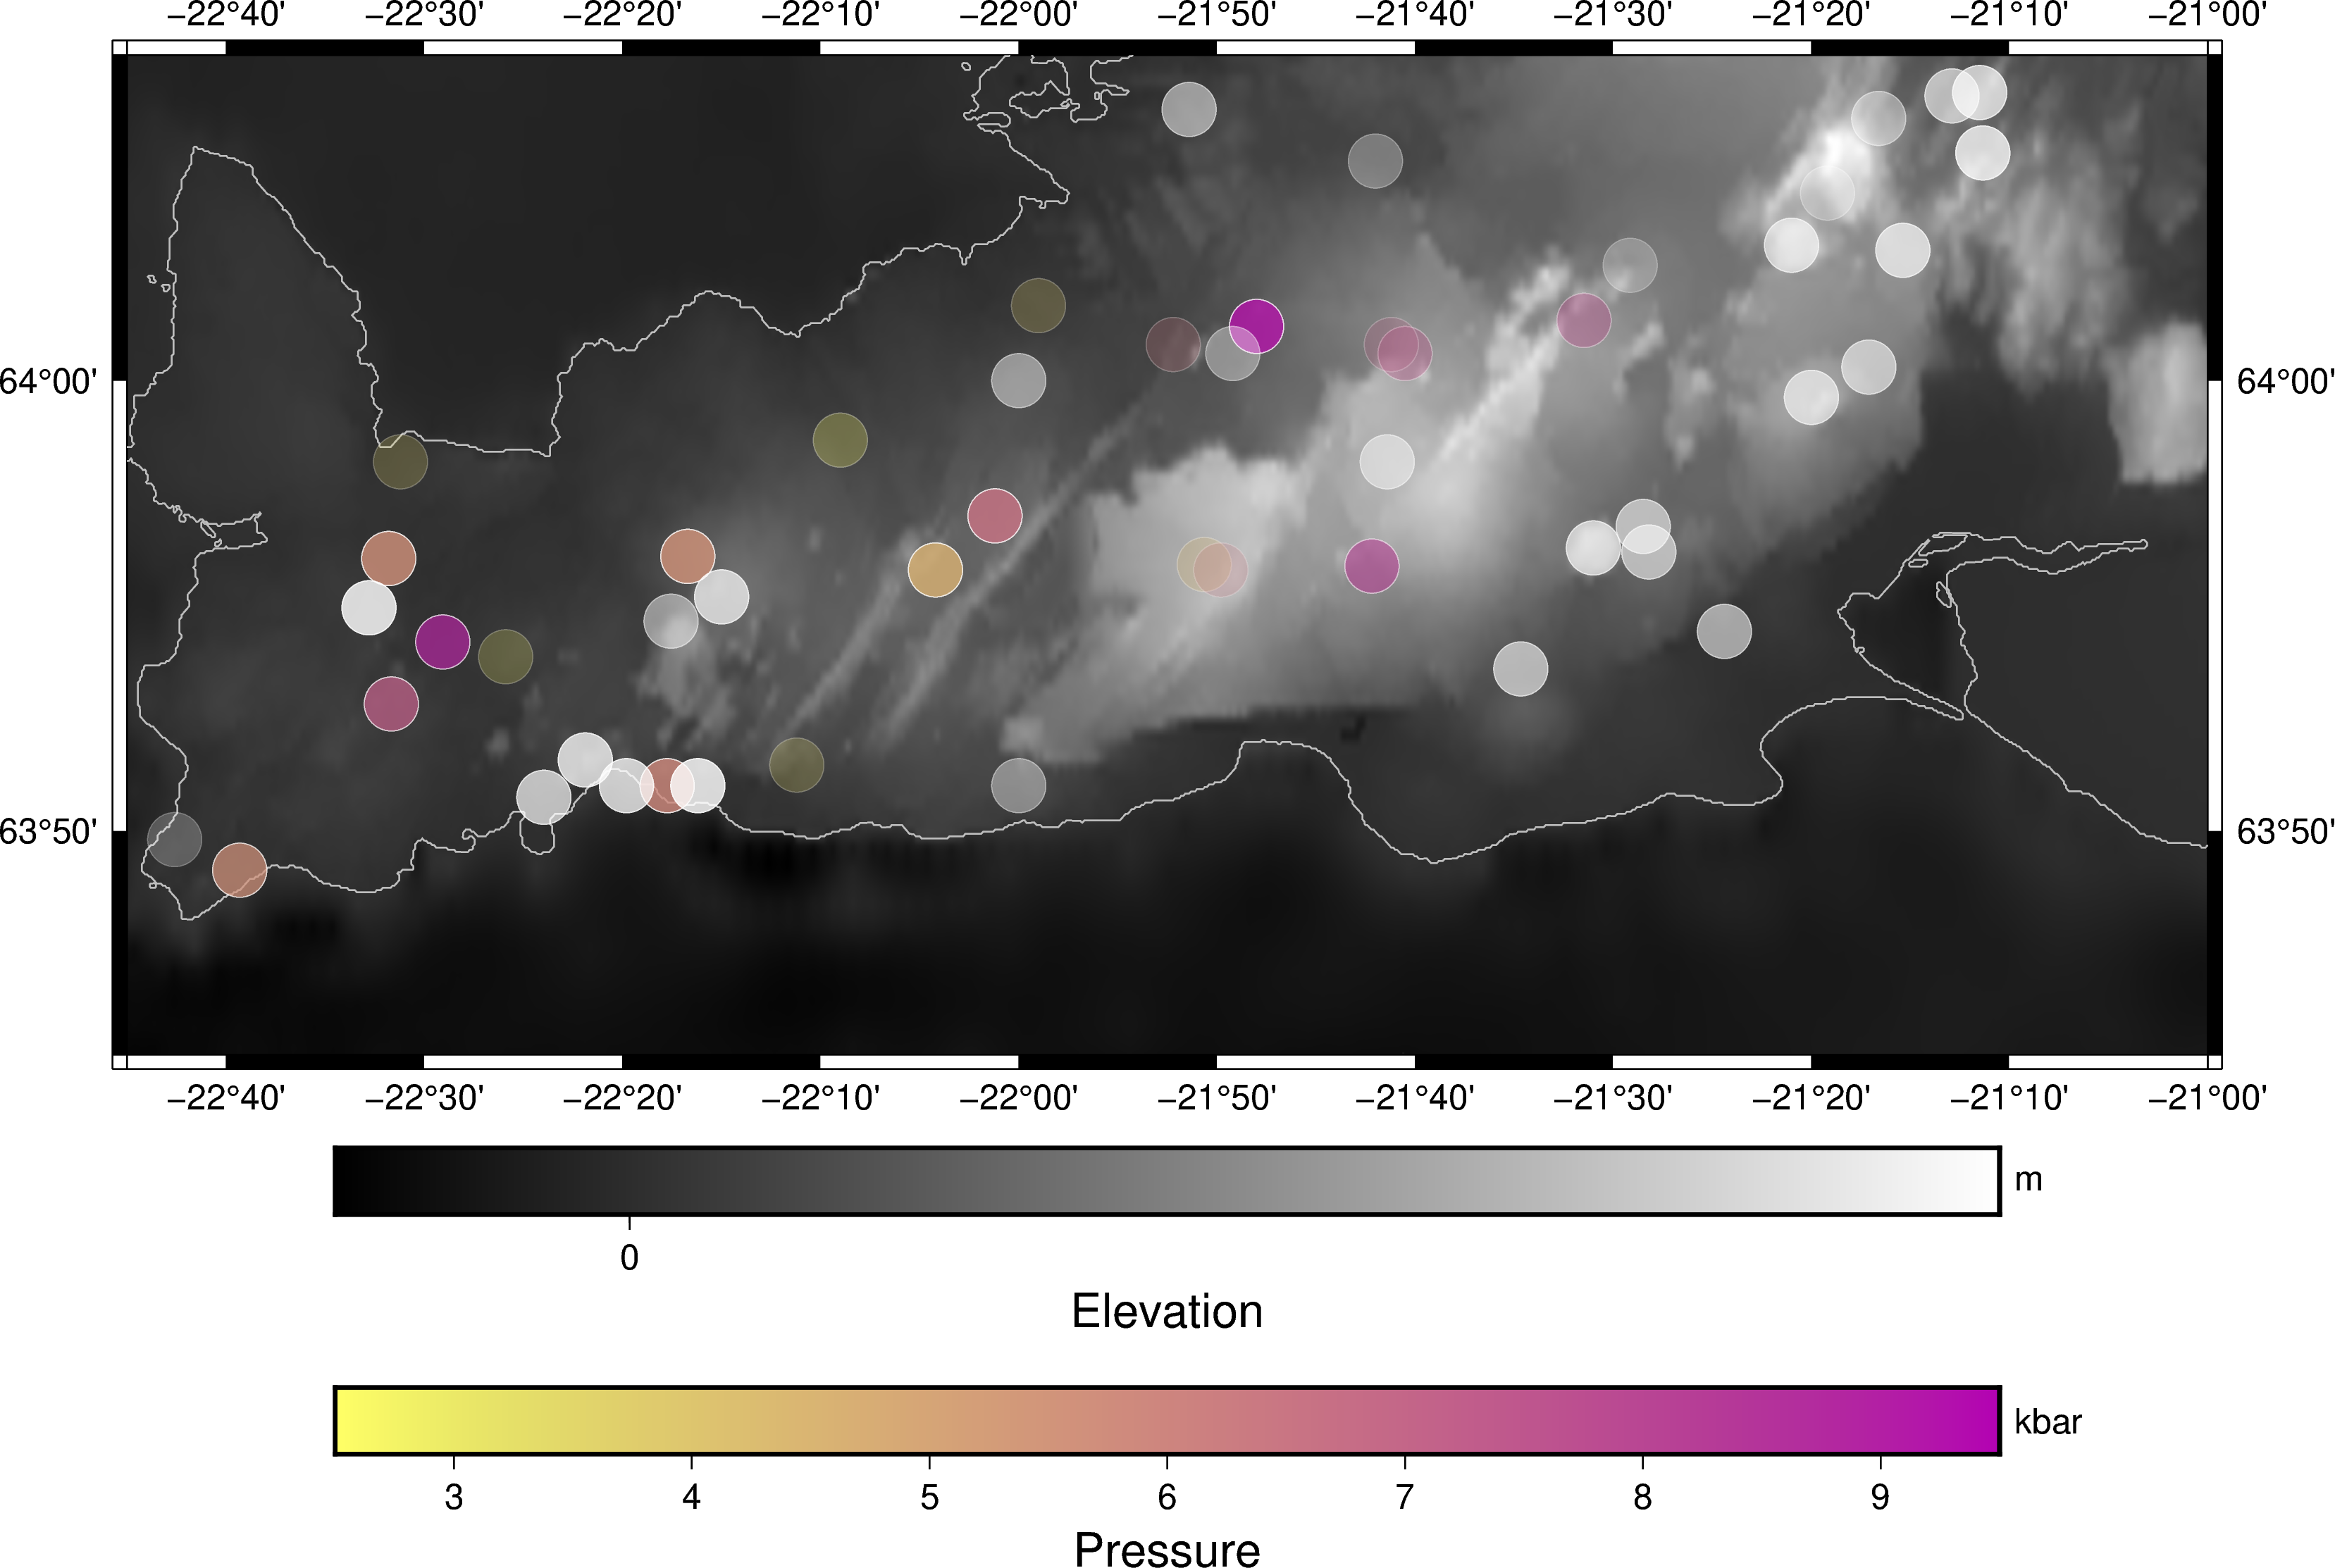

In [4]:


## next, we want to subset the petdb dataset to only include samples from the region.
## In PetDB, longitude goes from -180 to +180.  
#petsam = petbas[(petbas.LONGITUDE > -26.5) & (petbas.LONGITUDE < -24.5) & (petbas.LATITUDE > 62.) & (petbas.LATITUDE < 63.)]


fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M25c", frame="a", cmap="gray", shading=True) # haxby is a colorscale that is OK for oceans
#fig.grdcontour(grid=grid) # plot up contours
fig.coast(shorelines="1/0.5p,gray")
fig.colorbar(frame=["a1000", "x+lElevation", "y+lm"])
pygmt.makecpt(cmap="buda", series=[2.5, 9.5], background = "o", reverse=True) # color scale for Na2O - change series limits
# Plot using circles (c) of 0.15 cm, the sampled bathymetry points
# Points are colored using elevation values (normalized for visual purposes)
fig.plot(
    x=erupt_p.Longitude,
    y=erupt_p.Latitude,
    style="c0.65c",
    pen="white",
    cmap=True,
    color=erupt_p.P_av,
    transparency=80.-(erupt_p.num_min_age_wrt2000AD/erupt_p.num_min_age_wrt2000AD.max()*90.) # sill circle according color-scale
)
fig.colorbar(frame=["a1.0", "x+lPressure", "y+lkbar"],position="JBC+o0c/4c")
fig.show()


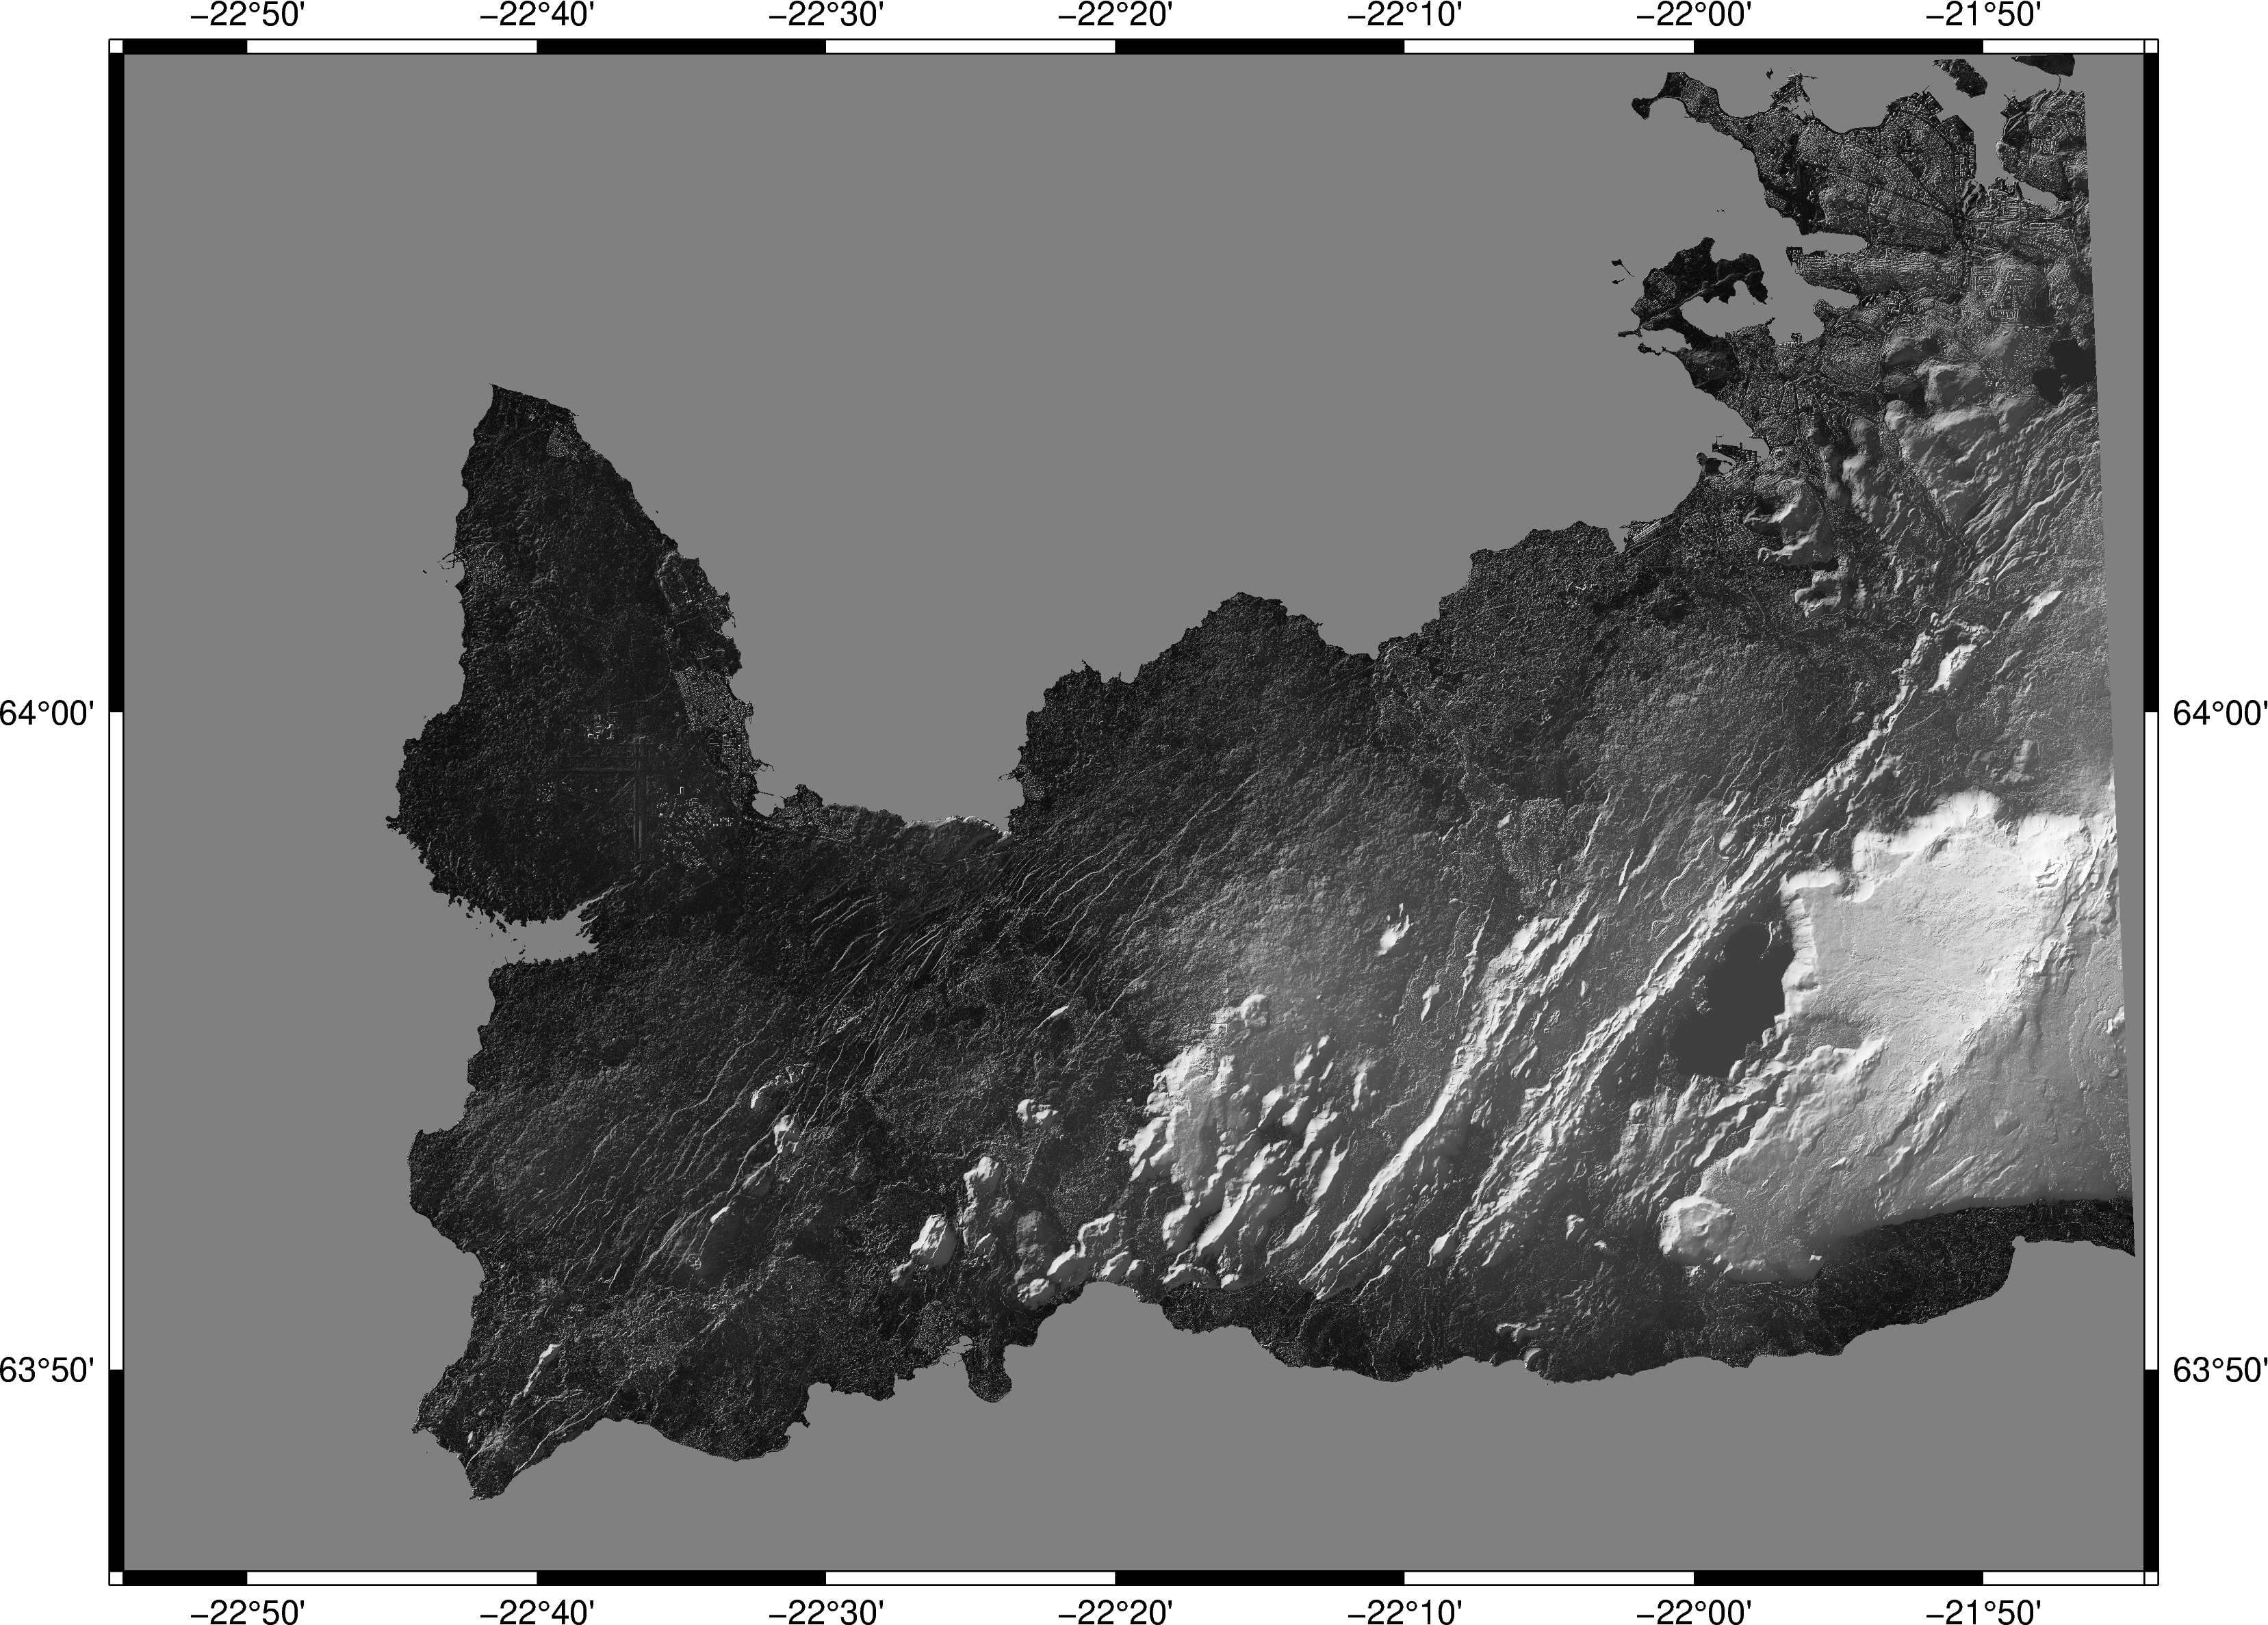

In [12]:
fig = pygmt.Figure()
grid = "reykjanes_dem.grd"
fig.grdimage(grid=grid, projection="M25c", frame="a", cmap="gray", shading = True) # haxby is a colorscale that is OK for oceans
fig.show()

In [13]:
fig.savefig("reyk_map_bw.png")